<a href="https://colab.research.google.com/github/salvacarou/coderhouse/blob/main/ProyectoDSParteICarou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Salvador Carou**

**Base de datos usada:**
**"Spotify Tracks DB"**
https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db

### **Abstract**

El presente proyecto utiliza como base de análisis el dataset “Ultimate Spotify Tracks DB”, el cual contiene más de 160.000 canciones recopiladas de la plataforma Spotify. El conjunto de datos incluye tanto información descriptiva de las canciones (título, artista, álbum, fecha de lanzamiento y popularidad) como un conjunto amplio de características musicales cuantitativas generadas mediante algoritmos de audio digital, tales como danceability, energy, acousticness, instrumentalness, valence, tempo y duration_ms, entre otras.

Un aspecto relevante es que algunas de estas métricas, como danceability o valence, podrían parecer subjetivas a simple vista; sin embargo, son calculadas mediante algoritmos que analizan propiedades rítmicas, armónicas y melódicas de cada canción. De esta forma, Spotify asigna valores normalizados en un rango de 0 a 1, donde 0 indica ausencia de la característica y 1 su presencia máxima. Esto permite comparar de manera objetiva canciones muy diferentes entre sí.

El objetivo principal de este trabajo es explorar cómo las características intrínsecas de las canciones se relacionan con su nivel de popularidad dentro de la plataforma. En particular, se busca indagar si existen patrones en los rasgos musicales que expliquen por qué ciertas canciones logran un mayor alcance entre los oyentes.

### ***Pregutas / Hipotesis***

* ¿Las canciones con mayores niveles de danceability y energy tienden a ser más
populares?

* ¿La duración de las canciones influye en su nivel de popularidad?

* ¿El modo musical (Major vs Minor) tiene relación con la popularidad de las canciones?

* ¿Las canciones instrumentales tienen menor popularidad que las canciones con voces?

* ¿Existe una relación entre la energía (energy) y el volumen promedio (loudness) de las canciones?

##**Objetivo**

El objetivo de este análisis es comprender qué características musicales influyen en la popularidad de las canciones en Spotify. Para ello se exploran distintas variables proporcionadas por el dataset —como danceability, energy, valence, instrumentalness, tempo y duration— con el fin de identificar patrones, tendencias y relaciones relevantes.

A través de preguntas específicas, visualizaciones y resúmenes numéricos, se busca:

* Analizar la relación entre rasgos musicales y el nivel de popularidad.
* Comparar cómo se comportan los diferentes géneros en términos de bailabilidad, energía y duración.
* Explorar la distribución de las canciones según sus características sonoras (modo mayor/menor, instrumental vs vocal).
* Detectar correlaciones entre variables que puedan explicar el éxito de ciertos temas.

En definitiva, el propósito es vincular las propiedades técnicas de la música con la recepción del público, ofreciendo una visión basada en datos sobre qué hace que una canción sea más escuchada dentro de la plataforma.

In [ ]:
# Traigo la base de datos usando la Api de kaggle

!pip install kaggle
!mkdir -p ~/.kaggle

import json
kaggle_token = {"username":"salvadorcarou","key":"5092c22139c9520de3ea01814c4f8d39"}
with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_token, f)
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d zaheenhamidani/ultimate-spotify-tracks-db -p /content
!unzip /content/ultimate-spotify-tracks-db.zip -d /content

import pandas as pd
df = pd.read_csv("/content/SpotifyFeatures.csv")
df.head()



Dataset URL: https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db
License(s): unknown
ultimate-spotify-tracks-db.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/ultimate-spotify-tracks-db.zip
replace /content/SpotifyFeatures.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

,0
genre,0
artist_name,0
track_name,1
track_id,0
popularity,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0


In [ ]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


,0
track_name,1


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


##**Analisis**

In [ ]:
genre_counts = df["genre"].value_counts().reset_index()
genre_counts.columns = ["genre", "count"]
genre_counts

,genre,count
0,Comedy,9681
1,Soundtrack,9646
2,Indie,9543
3,Jazz,9441
4,Pop,9386
5,Electronic,9377
6,Children’s Music,9353
7,Folk,9299
8,Hip-Hop,9295
9,Rock,9272


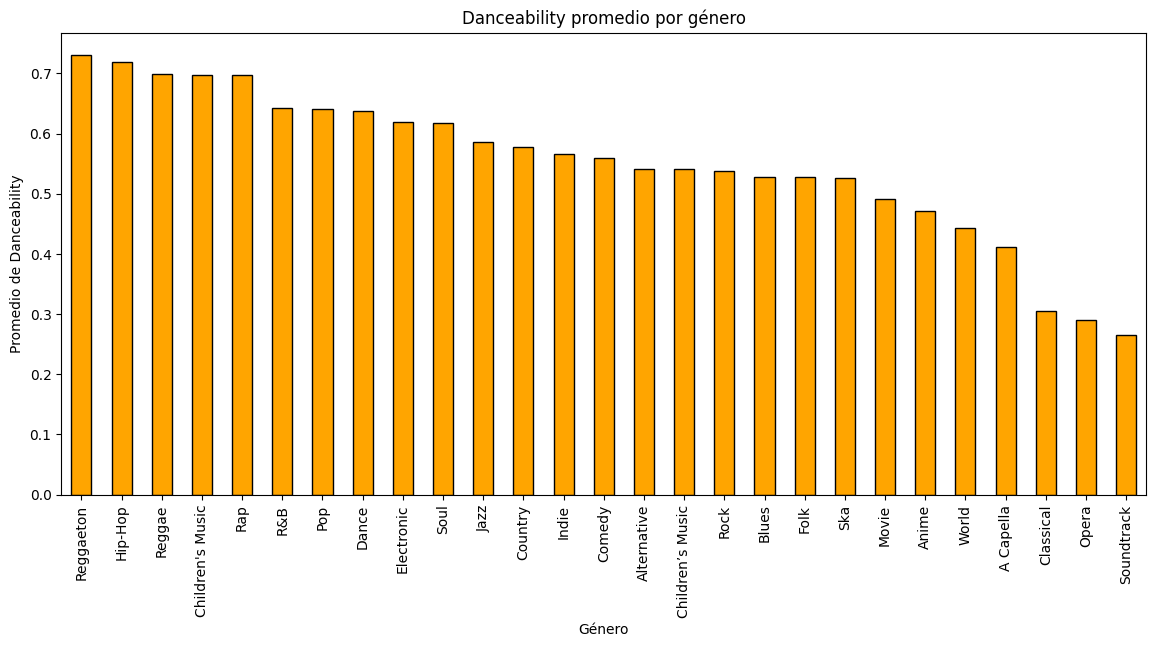

In [ ]:

danceable_genres = df.groupby("genre")["danceability"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,6))
danceable_genres.plot(kind="bar", color="orange", edgecolor="black")

plt.title("Danceability promedio por género")
plt.xlabel("Género")
plt.ylabel("Promedio de Danceability")
plt.xticks(rotation=90)
plt.show()


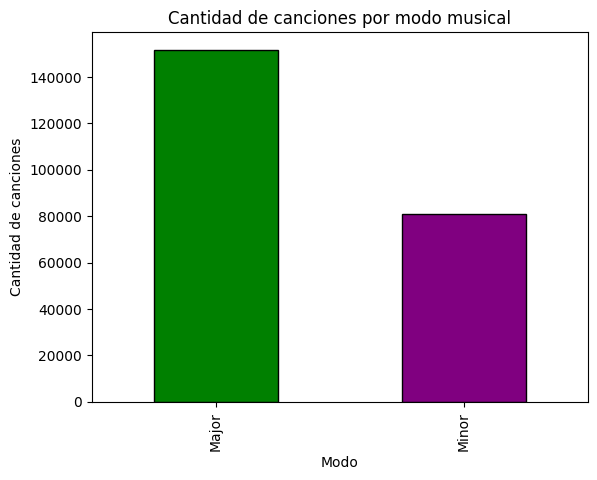

In [ ]:
df["mode"].unique()

# Major serian canciones alegres, positivas
# Minor son canciones tristes, lentas

mode_counts = df["mode"].value_counts()

mode_counts.plot(kind="bar", color=["green", "purple"], edgecolor="black")

plt.title("Cantidad de canciones por modo musical")
plt.xlabel("Modo")
plt.ylabel("Cantidad de canciones")
plt.show()



In [ ]:
resumen = pd.DataFrame({
    "Popularidad promedio": [df["popularity"].mean()],
    "Popularidad máxima": [df["popularity"].max()],
    "Duración promedio (min)": [df["duration_min"].mean()],
    "Duración mínima (min)": [df["duration_min"].min()],
    "Duración máxima (min)": [df["duration_min"].max()],
    "Danceability promedio": [df["danceability"].mean()],
    "Energy promedio": [df["energy"].mean()],
    "Valence promedio": [df["valence"].mean()],
    "Tempo promedio (BPM)": [df["tempo"].mean()]
})

resumen.T.rename(columns={0: "Valor"})

,Valor
Popularidad promedio,41.127502
Popularidad máxima,100.000000
Duración promedio (min),3.918706
Duración mínima (min),0.256450
Duración máxima (min),92.548617
Danceability promedio,0.554364
Energy promedio,0.570958
Valence promedio,0.454917
Tempo promedio (BPM),117.666585


### 1) ¿Las canciones con mayores niveles de danceability y energy tienden a ser más populares?

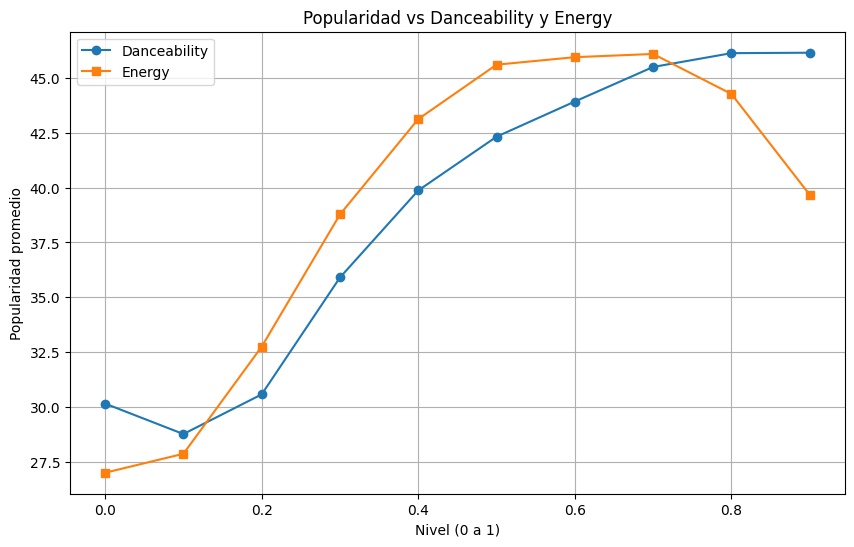

In [ ]:
df["dance_bin"] = (df["danceability"] * 10).astype(int) / 10
df["energy_bin"] = (df["energy"] * 10).astype(int) / 10

dance_pop = df.groupby("dance_bin")["popularity"].mean()
energy_pop = df.groupby("energy_bin")["popularity"].mean()

plt.figure(figsize=(10,6))
plt.plot(dance_pop.index, dance_pop.values, marker="o", label="Danceability")
plt.plot(energy_pop.index, energy_pop.values, marker="s", label="Energy")

plt.xlabel("Nivel (0 a 1)")
plt.ylabel("Popularidad promedio")
plt.title("Popularidad vs Danceability y Energy")
plt.legend()
plt.grid(True)
plt.show()


**Interpretación:**
El gráfico muestra que existe una relación positiva entre la danceability y la popularidad: las canciones más bailables tienden a ser más exitosas. En el caso de energy, también se observa un aumento de la popularidad a medida que crece la energía, aunque al llegar a valores muy altos la popularidad comienza a descender. Esto indica que un nivel de energía moderado a alto es atractivo para los oyentes, mientras que una energía excesiva puede reducir el alcance de la canción.

### 2) ¿La duración de las canciones influye en su nivel de popularidad?

/tmp/ipython-input-3746516123.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_means = df.groupby("duration_range")["popularity"].mean()


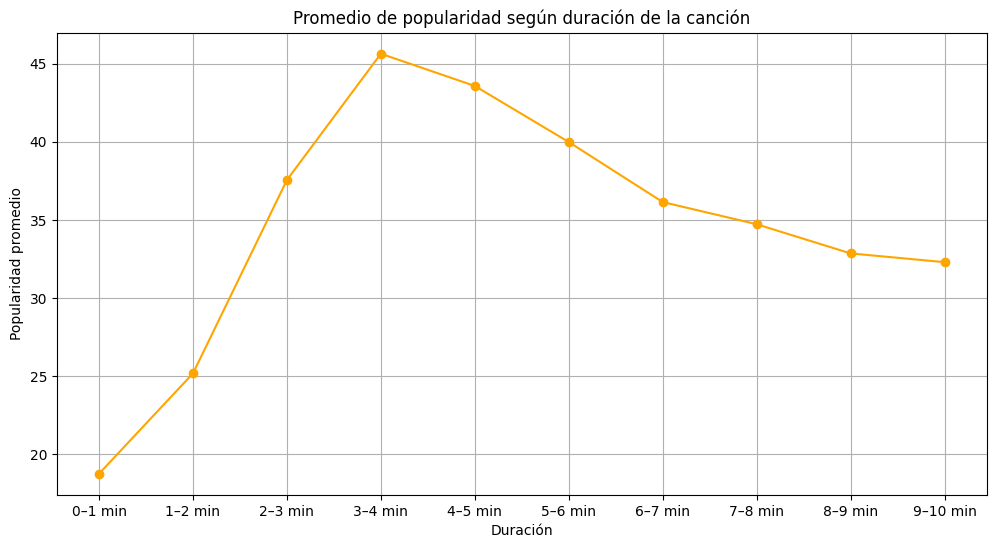

In [ ]:
df["duration_min"] = df["duration_ms"] / 60000

bins = list(range(0, 11))
labels = [f"{i}–{i+1} min" for i in range(0, 10)]
df["duration_range"] = pd.cut(df["duration_min"], bins=bins, labels=labels, right=False)

popularity_means = df.groupby("duration_range")["popularity"].mean()

plt.figure(figsize=(12,6))
plt.plot(popularity_means.index.astype(str), popularity_means.values, marker="o", color="orange")
plt.title("Promedio de popularidad según duración de la canción")
plt.xlabel("Duración")
plt.ylabel("Popularidad promedio")
plt.grid(True)
plt.show()



**Interpretacion**

Podemos ver como la popularidad de musica maxima esta en las canciones de 3 a 4 minutos

### 3) ¿El modo musical (Major vs Minor) tiene relación con la popularidad de las canciones?

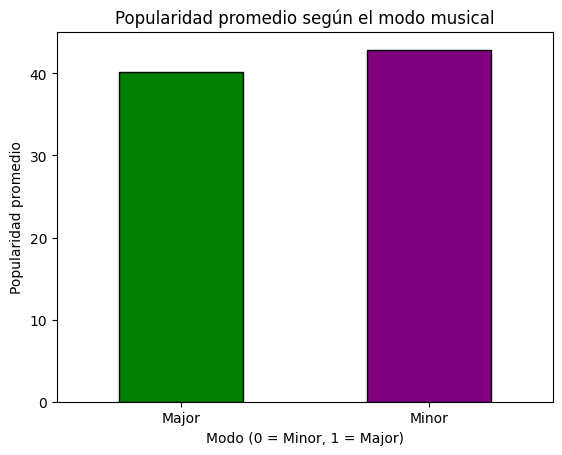

In [ ]:
mode_popularity = df.groupby("mode")["popularity"].mean()

mode_popularity.plot(
    kind="bar",
    color=["green", "purple"],
    edgecolor="black"
)

plt.title("Popularidad promedio según el modo musical")
plt.xlabel("Modo (0 = Minor, 1 = Major)")
plt.ylabel("Popularidad promedio")
plt.xticks(rotation=0)
plt.show()


**Interpretacion:**

Resulta que las canciones "Minor" son mas populares

### 4) ¿Las canciones instrumentales tienen menor popularidad que las canciones con voces?

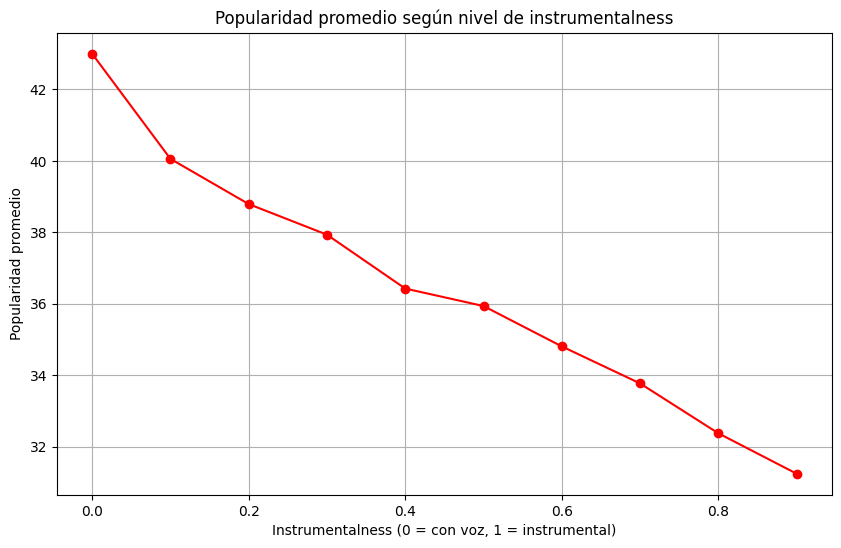

In [ ]:
df["instrumental_bin"] = (df["instrumentalness"] * 10).astype(int) / 10

instrumental_popularity = df.groupby("instrumental_bin")["popularity"].mean()

plt.figure(figsize=(10,6))
plt.plot(instrumental_popularity.index, instrumental_popularity.values, marker="o", color="red")

plt.title("Popularidad promedio según nivel de instrumentalness")
plt.xlabel("Instrumentalness (0 = con voz, 1 = instrumental)")
plt.ylabel("Popularidad promedio")
plt.grid(True)
plt.show()


**Interpretacion:**

Podemos ver como hay una clara preferencia en los consumidores, la musica con voz es completamnente superior a la instrumental

### 5) ¿Existe una relación entre la energía (energy) y el volumen promedio (loudness) de las canciones?

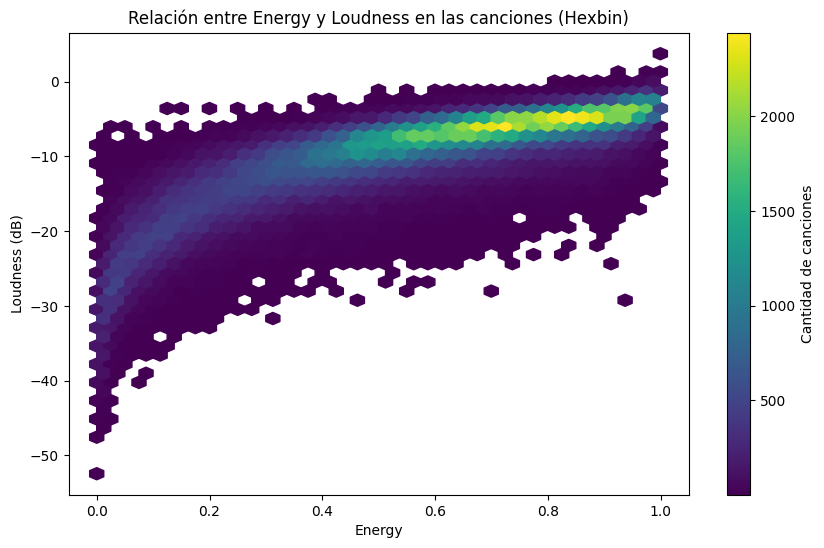

In [ ]:
plt.figure(figsize=(10,6))
plt.hexbin(df["energy"], df["loudness"], gridsize=40, cmap="viridis", mincnt=1)

plt.colorbar(label="Cantidad de canciones")
plt.xlabel("Energy")
plt.ylabel("Loudness (dB)")
plt.title("Relación entre Energy y Loudness en las canciones (Hexbin)")
plt.show()


**Interpretacion:**

El gráfico muestra una relación positiva clara: a mayor energy, las canciones tienden a tener un loudness más alto. La mayoría se concentra en niveles de energía medios-altos y volúmenes elevados.

## **Outliers Detection**

In [ ]:
# Outliers Detection
df["duration_min"] = df["duration_ms"] / 60000

original_size = df.shape[0]
print(f"Tamaño original del dataset: {original_size}")

Q1 = df["duration_min"].quantile(0.25)
Q3 = df["duration_min"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["duration_min"] < (Q1 - 1.5 * IQR)) | (df["duration_min"] > (Q3 + 1.5 * IQR))]
print(f"Número de outliers detectados en duración: {outliers.shape[0]}")

df_no_outliers = df[~((df["duration_min"] < (Q1 - 1.5 * IQR)) | (df["duration_min"] > (Q3 + 1.5 * IQR)))]
print(f"Tamaño del dataset después de eliminar outliers: {df_no_outliers.shape[0]}")


Tamaño original del dataset: 232725
Número de outliers detectados en duración: 14651
Tamaño del dataset después de eliminar outliers: 218074


#**Conclusion final**

El análisis realizado sobre el dataset de canciones de Spotify permitió identificar patrones claros entre las características musicales y la popularidad de las canciones. En primer lugar, observamos que la bailabilidad (danceability) tiene una relación positiva con la popularidad: a mayor nivel de bailabilidad, mayor éxito alcanzan las canciones. De manera similar, la energía (energy) influye de forma positiva, aunque cuando el nivel es excesivamente alto la popularidad tiende a disminuir, lo que sugiere que un equilibrio entre intensidad y atractivo rítmico resulta más favorable.

En cuanto a la duración, las canciones más exitosas se concentran en un rango de 3 a 4 minutos, lo que coincide con la estructura típica de los formatos comerciales más difundidos. Tanto canciones demasiado cortas como excesivamente largas presentan menores niveles de aceptación.

Respecto al carácter instrumental o vocal, los resultados muestran que las canciones con voz son claramente más populares que las instrumentales, lo que confirma la importancia de la presencia vocal en el consumo masivo de música. Además, al comparar los modos musicales, las canciones en modo menor (Minor) resultaron ser levemente más populares que las de modo mayor, lo que podría relacionarse con la preferencia de los oyentes por matices emocionales más complejos.

Finalmente, se comprobó una fuerte relación positiva entre la energía (energy) y el volumen promedio (loudness): las canciones con mayor energía tienden a ser más potentes en términos de volumen, concentrándose en rangos medios y altos.

En conjunto, estos hallazgos refuerzan la idea de que el éxito de una canción no depende de un solo atributo, sino de la combinación equilibrada de factores rítmicos, emocionales y estructurales.